# Advanced Pandas techniques - DAY 1

## Merging and Concatenating DataFrames in Pandas OVERVIEW

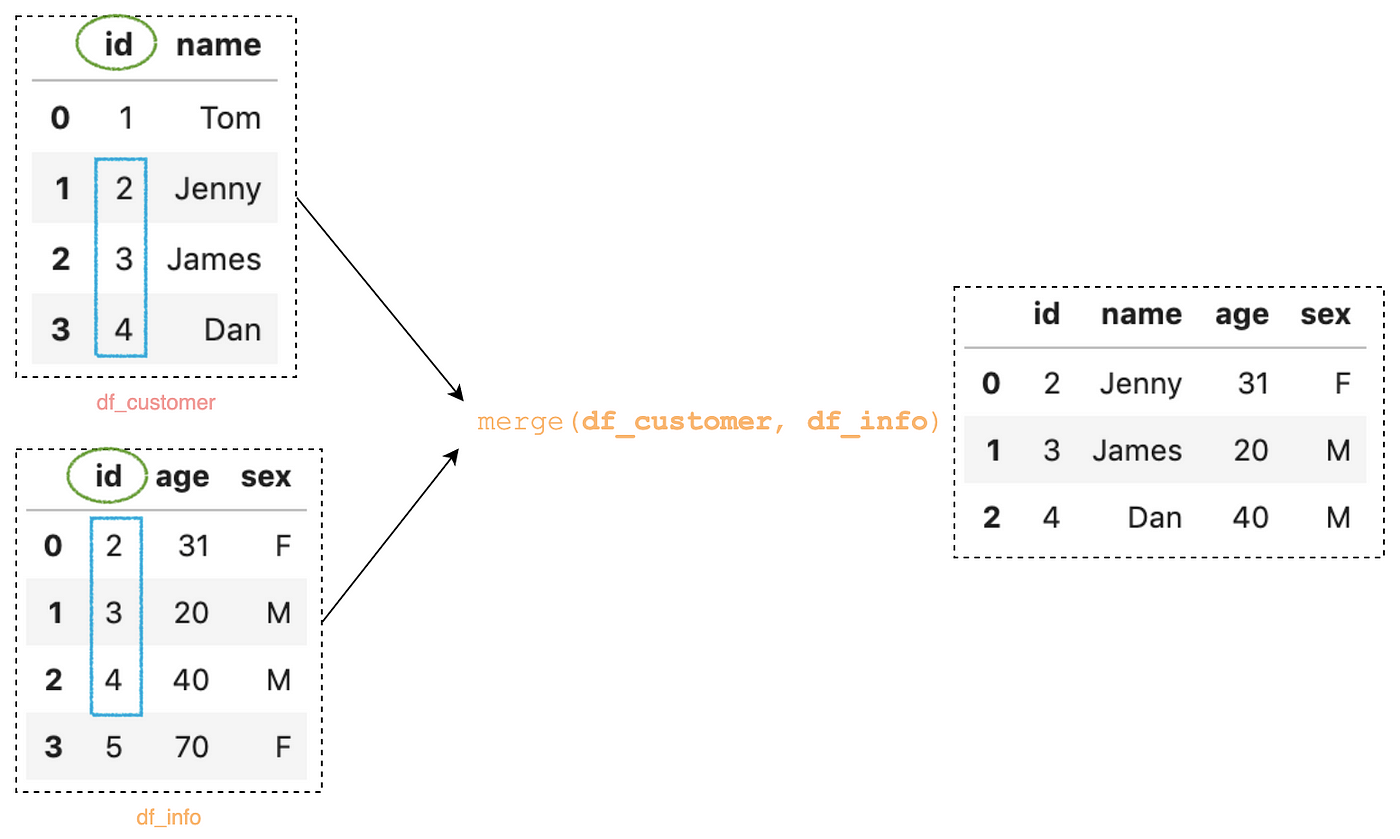




In Pandas, we often work with multiple datasets and need to combine them. There are two main ways to do this:

* Merging (pd.merge()): Think of it like a SQL JOIN. It helps combine two tables based on a common column.

* Concatenation (pd.concat()): Think of it like stacking LEGO blocks. It helps combine rows or columns from different tables.


Example 1: Merging Two DataFrames
Let’s say we have two small datasets—one with student names and IDs, and another with their marks.

In [ ]:
import pandas as pd

# First dataset: Student Information
students = pd.DataFrame({
    'Student_ID': [101, 102, 103],
    'Name': ['Alice', 'Bob', 'Charlie']
})

# Second dataset: Marks Information
marks = pd.DataFrame({
    'Student_ID': [101, 102, 104],  # Note: 104 is an extra student not in the first table
    'Marks': [85, 90, 78]
})

# Merging both datasets on 'Student_ID'
merged_data = pd.merge(students, marks, on='Student_ID', how='inner')  # Only common students
print(merged_data)


   Student_ID   Name  Marks
0         101  Alice     85
1         102    Bob     90


Since Charlie (103) had no marks and Student 104 had no name, they are excluded (inner join).

If we want to keep all students, we can use how='outer' instead of how='inner'.

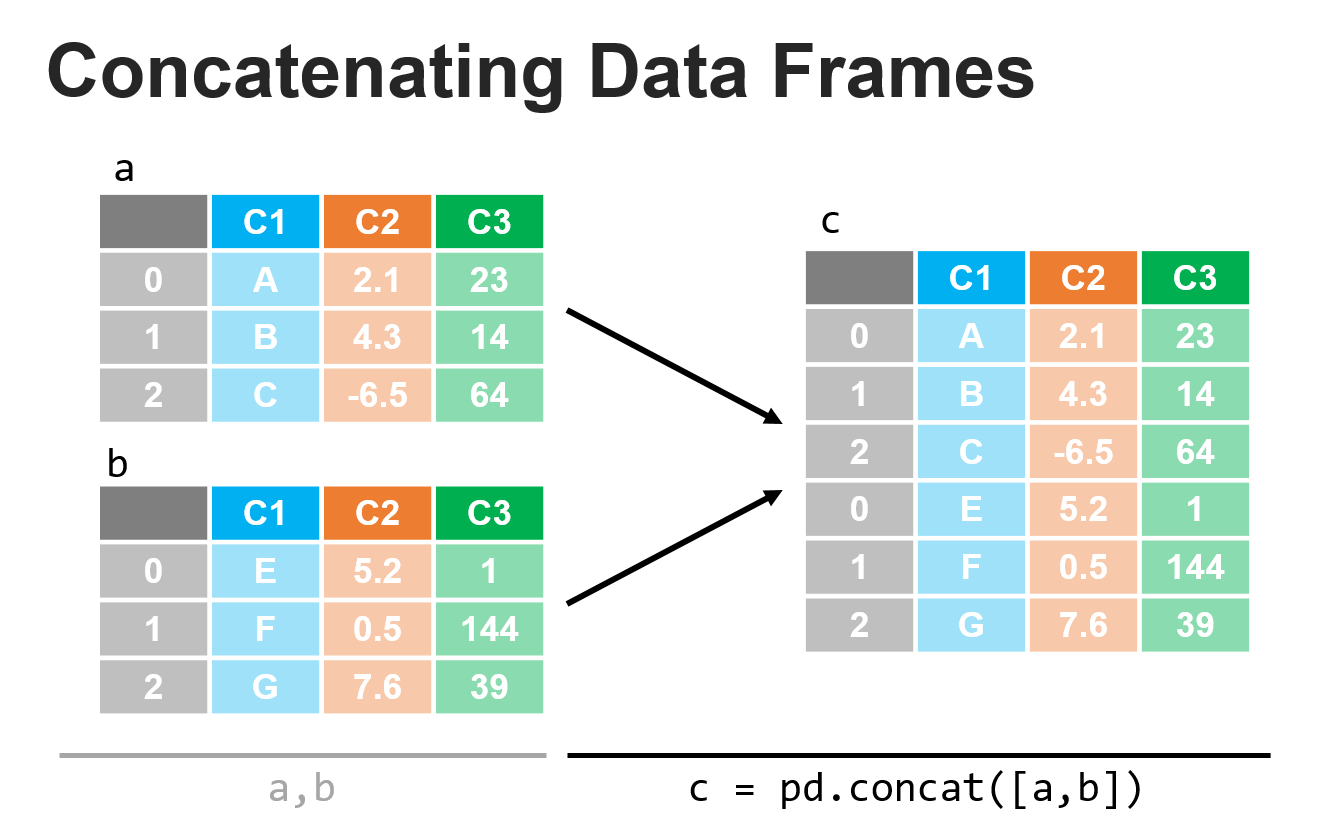

Concatenating Two DataFrames:

Now, let’s say we have two separate lists of students from different batches, and we want to combine them into one big list.

In [ ]:
# First batch
batch1 = pd.DataFrame({
    'Student_ID': [101, 102],
    'Name': ['krish', 'samrudhi']
})

# Second batch
batch2 = pd.DataFrame({
    'Student_ID': [103, 104],
    'Name': ['nikita', 'ayush']
})

# Concatenating along rows (axis=0)
all_students = pd.concat([batch1, batch2], ignore_index=True)
print(all_students)


   Student_ID     Name
0         101    Alice
1         102      Bob
2         103  Charlie
3         104    David


Here, pd.concat() stacks both datasets vertically like adding rows in a table.

We can also concatenate horizontally (axis=1) to join column-wise instead.

3. Applications of Merging and Concatenation
Merging is useful when combining data from different sources, like student records and exam results.

* Concatenation is useful when combining multiple datasets of the same structure, like appending daily sales reports.

* Used in real-world applications like data cleaning, analytics, and reporting.

##  Merging and Concatenating DataFrames in Pandas  - IN DEPTH

### 1. Merging DataFrames (pd.merge())


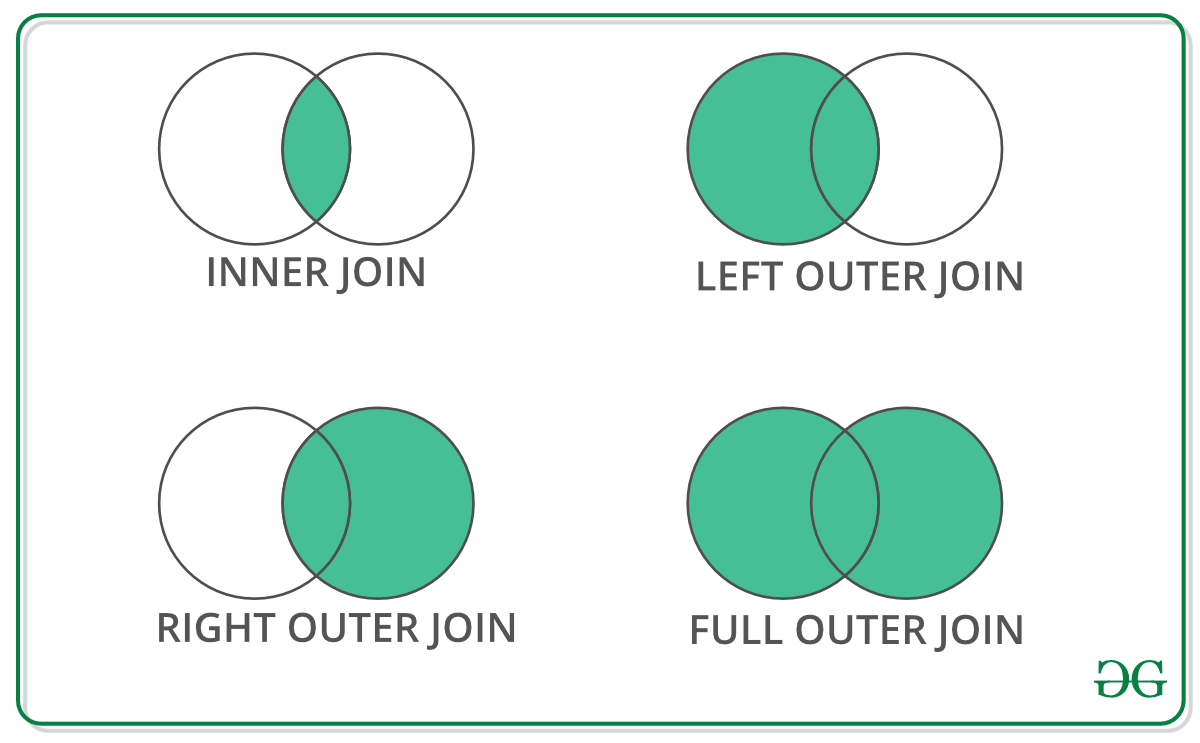

Merging (pd.merge())

Merging is used to combine two datasets based on common columns (like a database JOIN operation). It is helpful when datasets share some related information, such as:

1. Combining customer details with purchase history.

2. Merging employee records with department details.

3. Joining students’ marks with their names.

Types of Merging:

* Inner Merge – Keeps only matching rows.

* Left Merge – Keeps all rows from the left table, adding matching values from the right.

* Right Merge – Keeps all rows from the right table, adding matching values from the left.

* Outer Merge – Keeps everything from both tables, filling missing values with NaN.

-------------------

Explanation of the Concept

Merging helps combine two DataFrames based on a common column. It's similar to SQL joins and has different types:

* Inner Join: Keeps only matching rows.

* Left Join: Keeps all rows from the left table and matches from the right.

* Right Join: Keeps all rows from the right table.

* Outer Join: Keeps all data, even if there’s no match.

Example 1: Inner Join (Default Merge)
Let’s say we have students’ information and their marks stored in two DataFrames.


💡 Note: Student 103 (Charlie) had no marks and 104 had no name, so they are removed.

In [ ]:
import pandas as pd

# First dataset: Student Information
students = pd.DataFrame({
    'Student_ID': [101, 102, 103],
    'Name': ['Alice', 'Bob', 'Charlie']
})

# Second dataset: Marks Information
marks = pd.DataFrame({
    'Student_ID': [101, 102, 104],  # Student 104 is extra
    'Marks': [85, 90, 78]
})

# Inner join (default behavior)
merged_data = pd.merge(students, marks, on='Student_ID', how='inner')
print(merged_data)

merged_data = pd.merge(students, marks, on='Student_ID', how='left')
print(merged_data)

merged_data = pd.merge(students, marks, on='Student_ID', how='right')
print(merged_data)

outer_join = pd.merge(students, marks, on='Student_ID', how='outer')
print(outer_join)



   Student_ID   Name  Marks
0         101  Alice     85
1         102    Bob     90


Example 2: Left Join (Keep All Students)
What if we want to keep all students, even if they don’t have marks?

💡 Use Case: This is useful when you don’t want to lose important information, like all employees in a company, even if they didn’t get a bonus.

In [ ]:
left_join = pd.merge(students, marks, on='Student_ID', how='left')
print(left_join)


   Student_ID     Name  Marks
0         101    Alice   85.0
1         102      Bob   90.0
2         103  Charlie    NaN


Example 3: Right Join (Keep All Marks Data)

We want to keep all students who have marks, even if their name is missing.


💡 Use Case: Useful when some data sources only provide partial information, like sales records missing product names.

In [ ]:
right_join = pd.merge(students, marks, on='Student_ID', how='right')
print(right_join)


   Student_ID   Name  Marks
0         101  Alice     85
1         102    Bob     90
2         104    NaN     78


Example 4: Outer Join (Keep Everything!)
We want all students and all marks, filling missing values with NaN.

💡 Use Case: This is useful for full data integration, like combining all customers and their purchase history.



In [ ]:
outer_join = pd.merge(students, marks, on='Student_ID', how='outer')
print(outer_join)


   Student_ID     Name  Marks
0         101    Alice   85.0
1         102      Bob   90.0
2         103  Charlie    NaN
3         104      NaN   78.0


Example 5: Merging on Multiple Columns

What if we have multiple common columns? Let’s merge on both ID and Subject.

💡 Use Case: Combining class schedules, test results, and teachers’ data.

In [ ]:
grades1 = pd.DataFrame({
    'Student_ID': [101, 102, 101],
    'Subject': ['Math', 'Science', 'English'],
    'Marks': [90, 85, 88]
})

grades2 = pd.DataFrame({
    'Student_ID': [101, 102, 101],
    'Subject': ['Math', 'Science', 'English'],
    'Teacher': ['Mr. A', 'Ms. B', 'Mr. C']
})

# Merge on both Student_ID and Subject
merged_grades = pd.merge(grades1, grades2, on=['Student_ID', 'Subject'])
print(merged_grades)


   Student_ID  Subject  Marks Teacher
0         101     Math     90   Mr. A
1         102  Science     85   Ms. B
2         101  English     88   Mr. C


### 2. Concatenation (pd.concat())

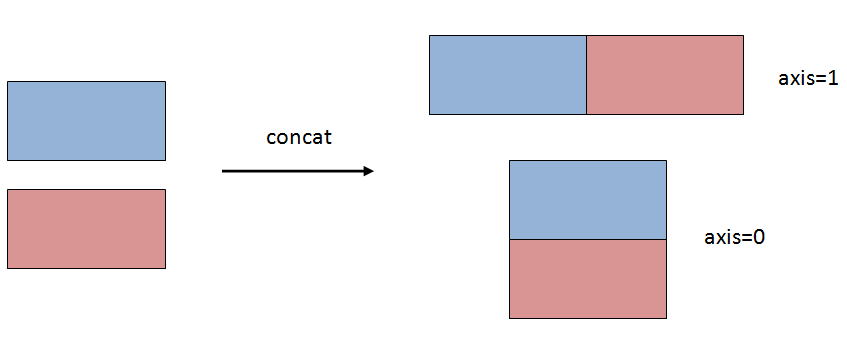

Concatenation is used to stack multiple datasets either vertically (adding rows) or horizontally (adding columns).

Used when datasets have similar structures but may not have a common key.
Unlike merging, it does not match values—it just joins data.


Types of Concatenation:

* Row-wise Concatenation (axis=0) – Stacks DataFrames on top of each other.
* Column-wise Concatenation (axis=1) – Joins DataFrames side by side.

💡 Example Uses:

1. Combining sales data from different months.
2. Merging multiple CSV files of transaction records.
3. Joining survey responses from different departments.


---------

Explanation of the Concept

Concatenation helps stack multiple datasets:

* axis=0 (default) → Adds rows (like stacking paper).


* axis=1 → Adds columns (like combining two lists side by side).

Example 1: Concatenating Rows
We have two batches of students and want to combine them into one DataFrame.

💡 Use Case: Combining attendance lists from different classes.

In [ ]:
batch1 = pd.DataFrame({'Student_ID': [101, 102], 'Name': ['Alice', 'Bob']})
batch2 = pd.DataFrame({'Student_ID': [103, 104], 'Name': ['Charlie', 'David']})

# Concatenating along rows
all_students = pd.concat([batch1, batch2], ignore_index=True)
print(all_students)


   Student_ID     Name
0         101    Alice
1         102      Bob
2         103  Charlie
3         104    David


Example 2: Concatenating Columns
We want to combine two lists of students and marks.

💡 Use Case: Used for combining survey results from different departments.


In [ ]:
df1 = pd.DataFrame({'Student_ID': [101, 102], 'Name': ['Alice', 'Bob']})
df2 = pd.DataFrame({'Marks': [85, 90]})

# Concatenating along columns
merged_df = pd.concat([df1, df2], axis=1)
print(merged_df)


   Student_ID   Name  Marks
0         101  Alice     85
1         102    Bob     90


Example 3: Ignoring Index While Concatenating

💡 Use Case: Combining student enrollments from different years.


The ignore_index parameter is commonly used in pandas operations like concat() and reset_index(). It determines whether the existing index should be ignored or maintained.

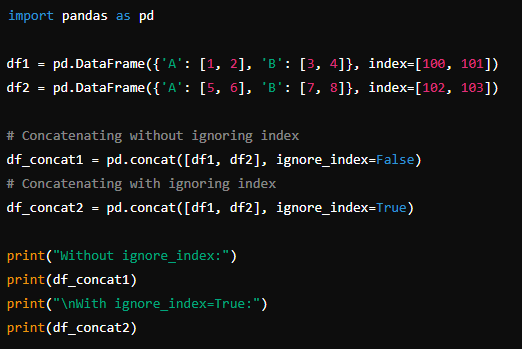

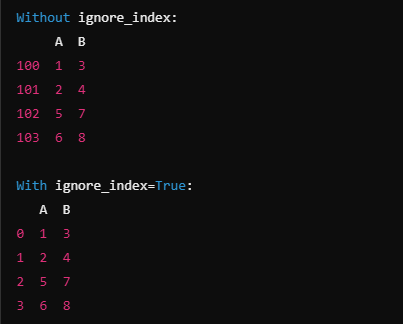

In [ ]:
batch1 = pd.DataFrame({'Name': ['Alice', 'Bob']})
batch2 = pd.DataFrame({'Name': ['Charlie', 'David']})

combined = pd.concat([batch1, batch2], ignore_index=True)
print(combined)


      Name
0    Alice
1      Bob
2  Charlie
3    David


Example 4: Concatenating with Different Columns

💡 Use Case: Used when datasets have missing fields.


In [ ]:
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'B': [5, 6], 'C': [7, 8]})

merged_df = pd.concat([df1, df2], ignore_index=True)
print(merged_df)


     A  B    C
0  1.0  3  NaN
1  2.0  4  NaN
2  NaN  5  7.0
3  NaN  6  8.0


Example 5: Concatenating with Keys

💡 Use Case: Used for tracking different data sources.




In [ ]:
df1 = pd.DataFrame({'Marks': [80, 85]})
df2 = pd.DataFrame({'Marks': [90, 95]})

final = pd.concat([df1, df2], keys=['Batch1', 'Batch2'])
print(final)


          Marks
Batch1 0     80
       1     85
Batch2 0     90
       1     95


🚀 Conclusion

Merge is for linking tables like a database.
Concat is for stacking tables together.

### 3. When to Use Both Together?

There are cases where we need to merge first to match data, and then concatenate different datasets for a complete view.

Example 1: Merging Student Data and Then Concatenating Results

We have two batches of students with their names and IDs.

 We also have marks data for some students.

💡 Why both? We first merged marks with students and then concatenated both batches to get a full list.

In [ ]:
import pandas as pd

# Batch 1 students
batch1 = pd.DataFrame({'Student_ID': [101, 102], 'Name': ['Alice', 'Bob']})

# Batch 2 students
batch2 = pd.DataFrame({'Student_ID': [103, 104], 'Name': ['Charlie', 'David']})

# Marks dataset
marks = pd.DataFrame({'Student_ID': [101, 103, 104], 'Marks': [85, 78, 90]})

# Step 1: Merge Marks with Individual Batches
batch1_merged = pd.merge(batch1, marks, on='Student_ID', how='left')
batch2_merged = pd.merge(batch2, marks, on='Student_ID', how='left')

# Step 2: Concatenate both batches
all_students = pd.concat([batch1_merged, batch2_merged], ignore_index=True)
print(all_students)


   Student_ID     Name  Marks
0         101    Alice   85.0
1         102      Bob    NaN
2         103  Charlie   78.0
3         104    David   90.0


Example 2: Combining Employee Records from Different Offices
We have two offices maintaining separate employee lists, and a separate dataset with salary details.

💡 Why both? First, we merged salaries with employee records. Then, we concatenated the two office datasets.

In [ ]:
# Office 1 Employees
office1 = pd.DataFrame({'Emp_ID': [1, 2], 'Name': ['John', 'Emma'], 'Department': ['HR', 'IT']})

# Office 2 Employees
office2 = pd.DataFrame({'Emp_ID': [3, 4], 'Name': ['Liam', 'Olivia'], 'Department': ['Sales', 'Marketing']})

# Salary Data
salary = pd.DataFrame({'Emp_ID': [1, 3, 4], 'Salary': [50000, 60000, 55000]})

# Step 1: Merge Salary with Individual Office Employees
office1_merged = pd.merge(office1, salary, on='Emp_ID', how='left')
office2_merged = pd.merge(office2, salary, on='Emp_ID', how='left')

# Step 2: Concatenate both office data
all_employees = pd.concat([office1_merged, office2_merged], ignore_index=True)
print(all_employees)


   Emp_ID    Name Department   Salary
0       1    John         HR  50000.0
1       2    Emma         IT      NaN
2       3    Liam      Sales  60000.0
3       4  Olivia  Marketing  55000.0


Example 3: Creating a Sales Report from Multiple Sources

A company has different product sales data and a separate file containing customer details.

💡 Why both? We merged customers with sales and concatenated sales from two stores.


In [ ]:
# Sales data from Store A
sales_A = pd.DataFrame({'Customer_ID': [101, 102], 'Product': ['Laptop', 'Phone'], 'Amount': [800, 500]})

# Sales data from Store B
sales_B = pd.DataFrame({'Customer_ID': [103, 104], 'Product': ['Tablet', 'Watch'], 'Amount': [300, 200]})

# Customer Information
customers = pd.DataFrame({'Customer_ID': [101, 102, 103, 104], 'Name': ['Alice', 'Bob', 'Charlie', 'David']})

# Step 1: Merge sales with customer details
sales_A_merged = pd.merge(sales_A, customers, on='Customer_ID', how='left')
sales_B_merged = pd.merge(sales_B, customers, on='Customer_ID', how='left')

# Step 2: Concatenate both stores' sales
all_sales = pd.concat([sales_A_merged, sales_B_merged], ignore_index=True)
print(all_sales)


   Customer_ID Product  Amount     Name
0          101  Laptop     800    Alice
1          102   Phone     500      Bob
2          103  Tablet     300  Charlie
3          104   Watch     200    David


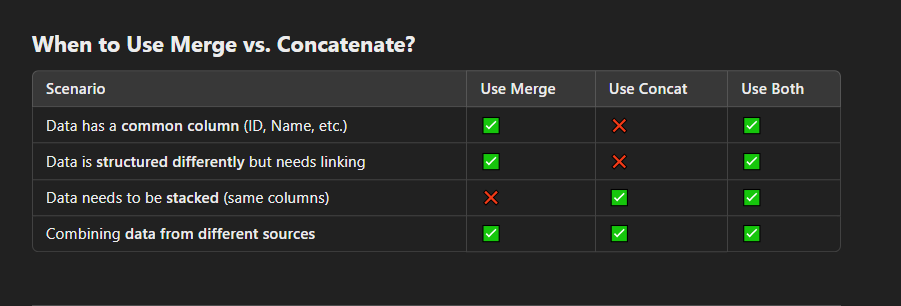

Summary

Use merge() when you need to match data based on a common key (like a database JOIN).

Use concat() when you need to stack datasets vertically or horizontally.

Sometimes, you need both: first merging related data, then concatenating complete datasets.

🚀 Next Step: Would you like some practice exercises based on this? 🎯

## Reshaping and Pivoting Data in Pandas

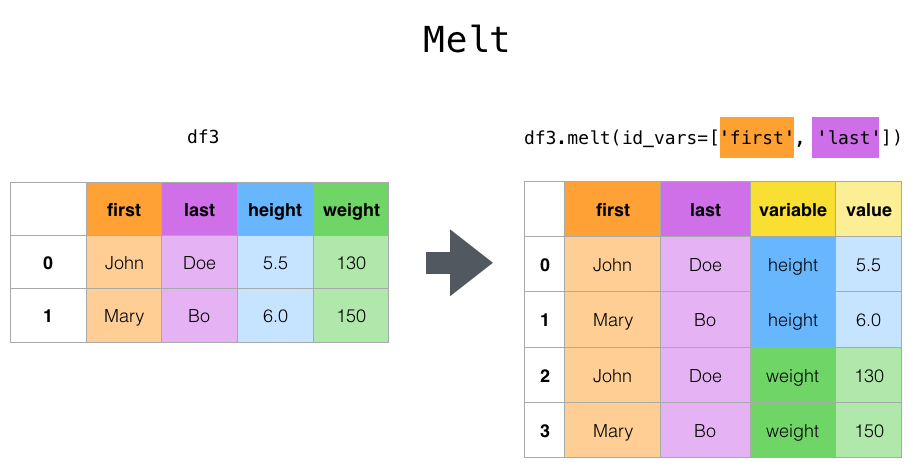

📌 Introduction

When working with real-world datasets, we often need to reshape or pivot data to make it easier to analyze.

Imagine you have data stored in a wide format, but you need it in a long format—or vice versa.

Pandas provides powerful functions to transform and reorganize data based on our needs.

Why is Reshaping and Pivoting Important?

✅ Makes data more readable and structured.

✅ Helps in preparing datasets for visualization.

✅ Essential for grouping and aggregating data.

✅ Useful when working with time-series and multi-index data.

🔹 Reshaping Data

1️⃣ melt() - Converting Wide Data to Long Format

The melt() function helps convert a wide dataset into a long format.

It is useful when you have column names as variable values, and you need a single column to represent them.





Example 1: Sales Data - Wide to Long Format


💡 Why Use melt()?
Now, the sales data is in a long format, making it easier for grouping and analysis.



In [ ]:
import pandas as pd

# Creating a dataset
df = pd.DataFrame({
    'Store': ['A', 'B', 'C'],
    'Jan_Sales': [200, 150, 300],
    'Feb_Sales': [250, 180, 320],
    'Mar_Sales': [300, 200, 350]
})

print("Original DataFrame:")
print(df)

# Using melt() to reshape
df_melted = df.melt(id_vars=['Store'], var_name='Month', value_name='Sales')

print("\nReshaped DataFrame:")
print(df_melted)


Original DataFrame:
  Store  Jan_Sales  Feb_Sales  Mar_Sales
0     A        200        250        300
1     B        150        180        200
2     C        300        320        350

Reshaped DataFrame:
  Store      Month  Sales
0     A  Jan_Sales    200
1     B  Jan_Sales    150
2     C  Jan_Sales    300
3     A  Feb_Sales    250
4     B  Feb_Sales    180
5     C  Feb_Sales    320
6     A  Mar_Sales    300
7     B  Mar_Sales    200
8     C  Mar_Sales    350


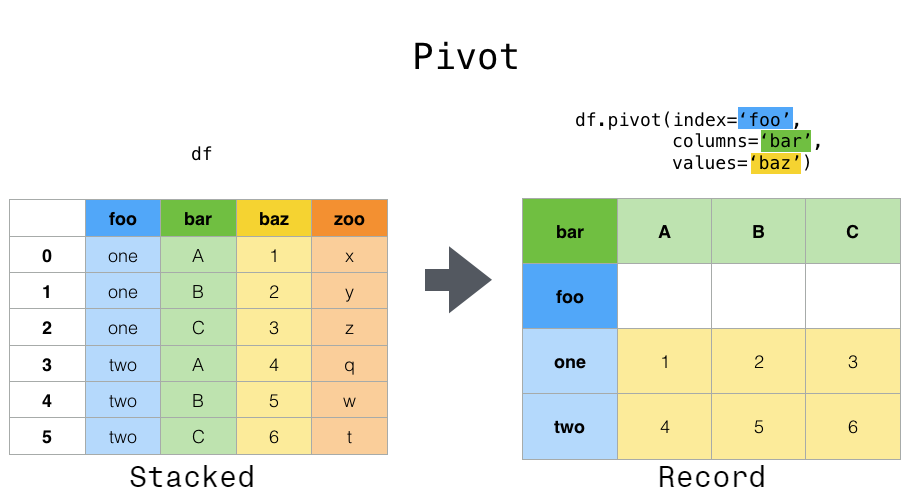

2️⃣ pivot() - Converting Long Data to Wide Format

The pivot() function reshapes long data into a wide format by making unique values in a column into separate columns.





Example 2: Employee Work Hours - Long to Wide Format

💡 Why Use pivot()?
This helps convert repeated values into a more structured table where each day becomes a separate column.


In [ ]:
df = pd.DataFrame({
    'Employee': ['John', 'John', 'John', 'Emma', 'Emma', 'Emma'],
    'Day': ['Monday', 'Tuesday', 'Wednesday', 'Monday', 'Tuesday', 'Wednesday'],
    'Hours_Worked': [8, 7, 9, 6, 5, 8]
})

print("Original DataFrame:")
print(df)

# Using pivot() to reshape
df_pivoted = df.pivot(index='Employee', columns='Day', values='Hours_Worked')

print("\nReshaped DataFrame:")
print(df_pivoted)


Original DataFrame:
  Employee        Day  Hours_Worked
0     John     Monday             8
1     John    Tuesday             7
2     John  Wednesday             9
3     Emma     Monday             6
4     Emma    Tuesday             5
5     Emma  Wednesday             8

Reshaped DataFrame:
Day       Monday  Tuesday  Wednesday
Employee                            
Emma           6        5          8
John           8        7          9


🔹 Pivoting with Aggregation

3️⃣ pivot_table() - Applying Aggregations While Pivoting
Unlike pivot(), pivot_table() allows us to summarize values using aggregation functions.



Example 3: Sales Summary for Different Stores

💡 Why Use pivot_table()?
Now, sales are summarized per Store and Product—this is great for reporting! 📊


In [ ]:
df = pd.DataFrame({
    'Store': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Product': ['Laptop', 'Phone', 'Laptop', 'Phone', 'Laptop', 'Phone'],
    'Sales': [1000, 500, 1200, 700, 1100, 650]
})

print("Original DataFrame:")
print(df)

# Using pivot_table() to aggregate sales
df_pivot_table = df.pivot_table(index='Store', columns='Product', values='Sales', aggfunc='sum')

print("\nReshaped DataFrame:")
print(df_pivot_table)


Original DataFrame:
  Store Product  Sales
0     A  Laptop   1000
1     A   Phone    500
2     B  Laptop   1200
3     B   Phone    700
4     C  Laptop   1100
5     C   Phone    650

Reshaped DataFrame:
Product  Laptop  Phone
Store                 
A          1000    500
B          1200    700
C          1100    650


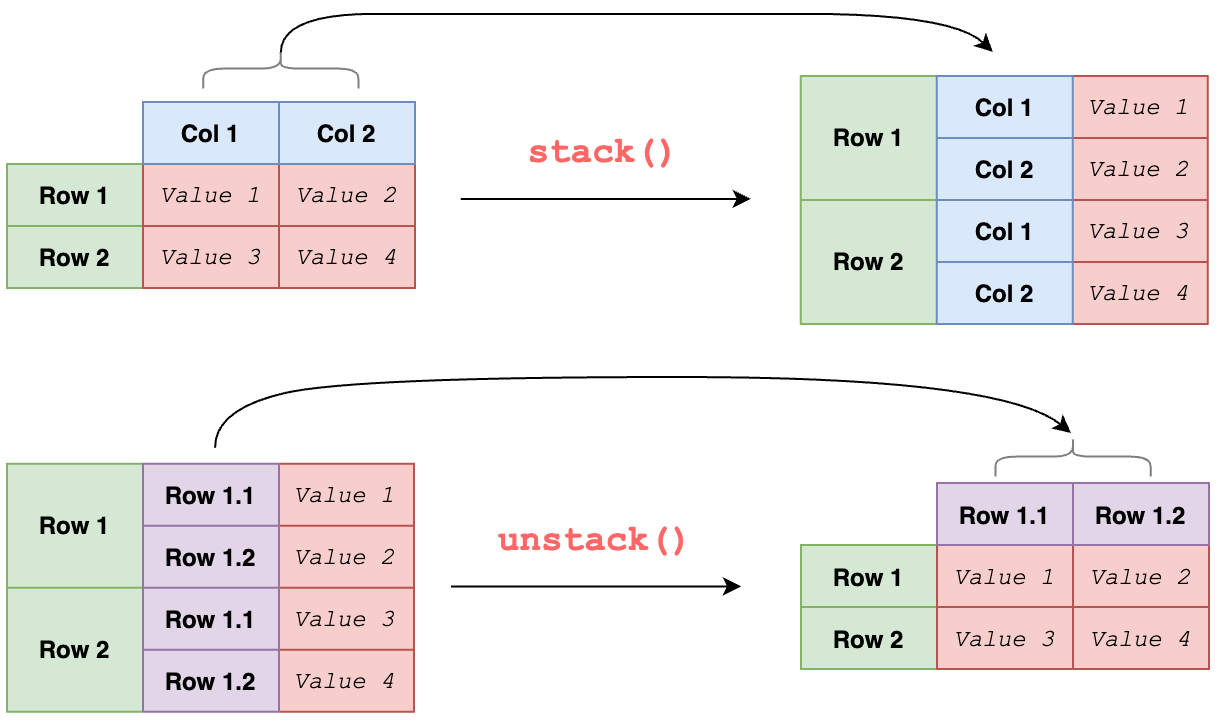

🔹 Stack and Unstack

4️⃣ stack() and unstack() - Changing Levels of Indexing

* stack() converts columns into rows.

* unstack() converts rows into columns.




Example 4: Transforming Multi-Level Data


💡 Why Use stack() and unstack()?
This is helpful when working with multi-indexed data and converting between different formats.

In [ ]:
df = pd.DataFrame({
    'Year': [2023, 2023, 2024, 2024],
    'Quarter': ['Q1', 'Q2', 'Q1', 'Q2'],
    'Revenue': [10000, 15000, 12000, 17000]
})

print("Original DataFrame:")
print(df)

# Converting columns into multi-level index
df_stacked = df.set_index(['Year', 'Quarter']).stack()

print("\nStacked DataFrame:")
print(df_stacked)

# Unstacking back to a table format
df_unstacked = df_stacked.unstack()

print("\nUnstacked DataFrame:")
print(df_unstacked)


Original DataFrame:
   Year Quarter  Revenue
0  2023      Q1    10000
1  2023      Q2    15000
2  2024      Q1    12000
3  2024      Q2    17000

Stacked DataFrame:
Year  Quarter         
2023  Q1       Revenue    10000
      Q2       Revenue    15000
2024  Q1       Revenue    12000
      Q2       Revenue    17000
dtype: int64

Unstacked DataFrame:
              Revenue
Year Quarter         
2023 Q1         10000
     Q2         15000
2024 Q1         12000
     Q2         17000


🔹 Combining Reshaping Methods

5️⃣ Combining melt(), pivot(), and pivot_table()

Imagine we have student scores in different subjects, and we want to analyze them differently.


💡 Why Use This?

melt() makes it easy to analyze marks subject-wise.
pivot() converts it back to a structured format.


In [ ]:
df = pd.DataFrame({
    'Student': ['Alice', 'Bob', 'Charlie'],
    'Math': [85, 78, 90],
    'Science': [88, 82, 95],
    'English': [92, 80, 85]
})

print("Original DataFrame:")
print(df)

# Step 1: Convert wide to long format using melt
df_long = df.melt(id_vars=['Student'], var_name='Subject', value_name='Marks')
print("\nLong Format DataFrame:")
print(df_long)

# Step 2: Convert long format back to wide using pivot
df_pivoted = df_long.pivot(index='Student', columns='Subject', values='Marks')
print("\nPivoted DataFrame:")
print(df_pivoted)


Original DataFrame:
   Student  Math  Science  English
0    Alice    85       88       92
1      Bob    78       82       80
2  Charlie    90       95       85

Long Format DataFrame:
   Student  Subject  Marks
0    Alice     Math     85
1      Bob     Math     78
2  Charlie     Math     90
3    Alice  Science     88
4      Bob  Science     82
5  Charlie  Science     95
6    Alice  English     92
7      Bob  English     80
8  Charlie  English     85

Pivoted DataFrame:
Subject  English  Math  Science
Student                        
Alice         92    85       88
Bob           80    78       82
Charlie       85    90       95


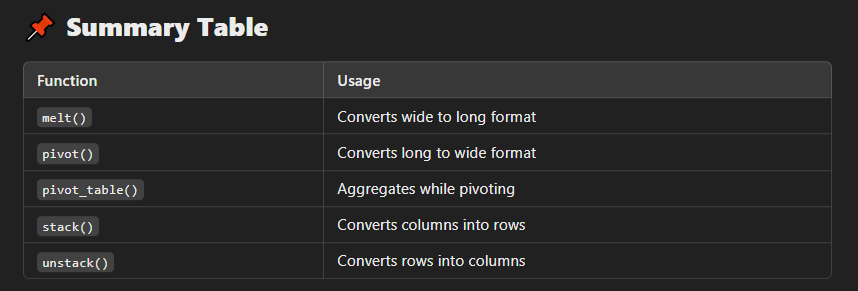

##  Mapping, Renaming, and Replacing Data in Pandas

When working with datasets, we often need to map values, rename columns, or replace data to make it more understandable and structured.

These techniques are useful in data cleaning, feature engineering, and transforming datasets for analysis.



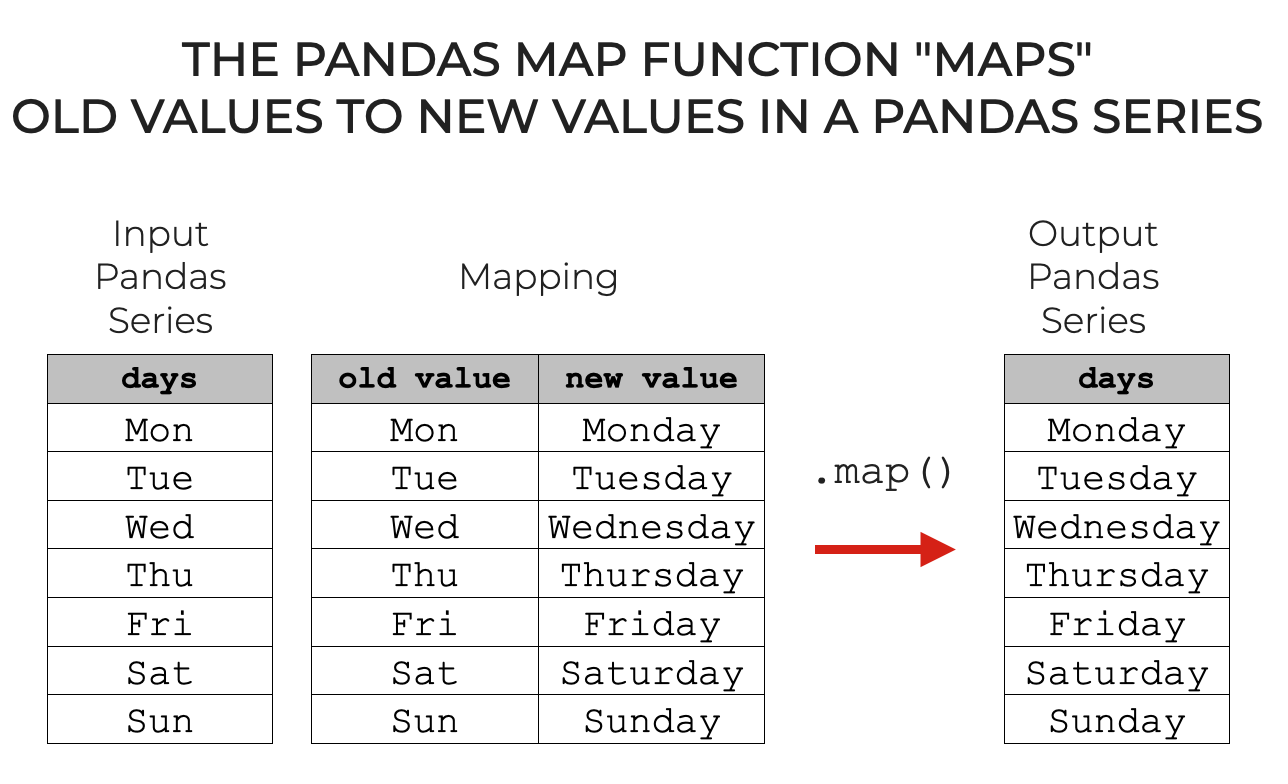

🔹 1️⃣ Mapping Data in Pandas

📖 What is Mapping?

Mapping is used to convert or transform values in a column based on a predefined mapping dictionary or function. It is especially useful when we need to replace categorical labels with numeric values or transform data into a more readable format.




📌 Example 1: Mapping Categorical Data to Numeric Values

Let’s say we have a dataset where employee job roles are stored as text, and we want to assign numeric codes to them.


💡 Why Use Mapping?

✅ Converts categorical labels into numeric values for analysis.

✅ Helps in ML preprocessing where models work better with numbers.

In [ ]:
import pandas as pd

# Creating a dataset
df = pd.DataFrame({
    'Employee': ['John', 'Alice', 'Robert', 'Maya'],
    'Job Role': ['Manager', 'Analyst', 'Clerk', 'Manager']
})

# Creating a mapping dictionary
job_mapping = {'Manager': 1, 'Analyst': 2, 'Clerk': 3}

# Applying the mapping
df['Job Code'] = df['Job Role'].map(job_mapping)

print(df)


  Employee Job Role  Job Code
0     John  Manager         1
1    Alice  Analyst         2
2   Robert    Clerk         3
3     Maya  Manager         1


📌 Example 2: Mapping Values Based on Conditions

We can use mapping with lambda functions to assign values dynamically.

💡 Why Use This?

✅ Efficient way to classify or categorize numerical values.

✅ Avoids multiple if-else conditions while handling datasets.



In [ ]:
# Creating a dataset
df = pd.DataFrame({
    'Student': ['Amit', 'Neha', 'Rohan', 'Sara'],
    'Marks': [85, 72, 90, 65]
})

# Applying mapping with lambda function to assign grades
df['Grade'] = df['Marks'].map(lambda x: 'A' if x >= 80 else ('B' if x >= 70 else 'C'))

print(df)

  Student  Marks Grade
0    Amit     85     A
1    Neha     72     B
2   Rohan     90     A
3    Sara     65     C


📌 Example 3: Mapping Dates to Weekdays


💡 Why Use This?

✅ Helps in time-series analysis by adding meaningful labels.

In [ ]:
df = pd.DataFrame({
    'Date': pd.date_range(start='2024-02-01', periods=5, freq='D')
})

# Mapping dates to weekday names
df['Weekday'] = df['Date'].dt.day_name()

print(df)

        Date   Weekday
0 2024-02-01  Thursday
1 2024-02-02    Friday
2 2024-02-03  Saturday
3 2024-02-04    Sunday
4 2024-02-05    Monday


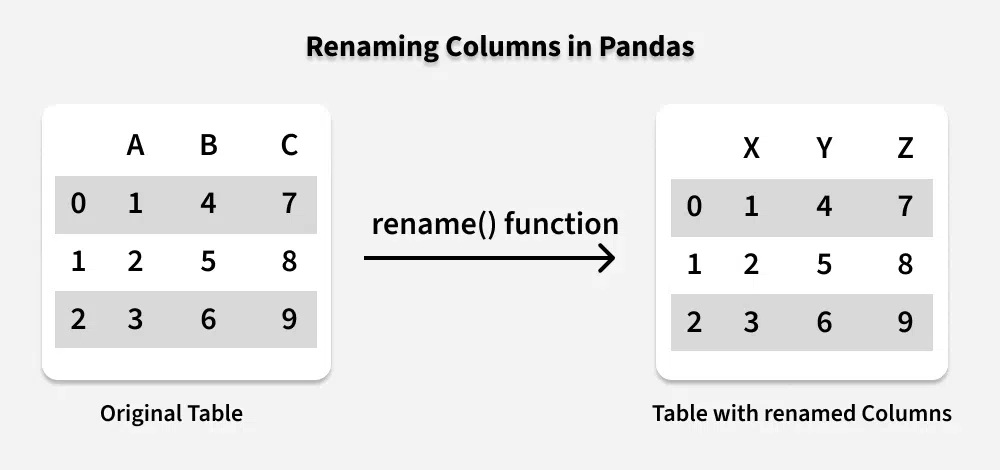

🔹 2️⃣ Renaming Columns and Indexes in Pandas

📖 What is Renaming?

Renaming is used to change column names or index values in a DataFrame.

This is helpful when dealing with inconsistent column names, merging datasets, or improving readability.

📌 Example 4: Renaming Columns in a DataFrame

💡 Why Use This?

✅ Improves dataset readability.

✅ Standardizes column names for consistency.

In [ ]:
df = pd.DataFrame({
    'emp_name': ['John', 'Alice', 'Robert'],
    'emp_dept': ['HR', 'Finance', 'IT'],
    'emp_salary': [50000, 60000, 55000]
})

# Renaming columns for better readability
df.rename(columns={'emp_name': 'Employee Name', 'emp_dept': 'Department', 'emp_salary': 'Salary'}, inplace=True)

print(df)

  Employee Name Department  Salary
0          John         HR   50000
1         Alice    Finance   60000
2        Robert         IT   55000


📌 Example 5: Renaming Index Values

We can rename index values to make them more meaningful.

💡 Why Use This?

✅ Useful when working with multi-indexed datasets.



In [ ]:
df = pd.DataFrame({
    'Sales': [1000, 1500, 1200],
    'Profit': [200, 300, 250]
}, index=['Store_A', 'Store_B', 'Store_C'])

# Renaming index values
df.rename(index={'Store_A': 'Mumbai Store', 'Store_B': 'Delhi Store'}, inplace=True)

print(df)

              Sales  Profit
Mumbai Store   1000     200
Delhi Store    1500     300
Store_C        1200     250


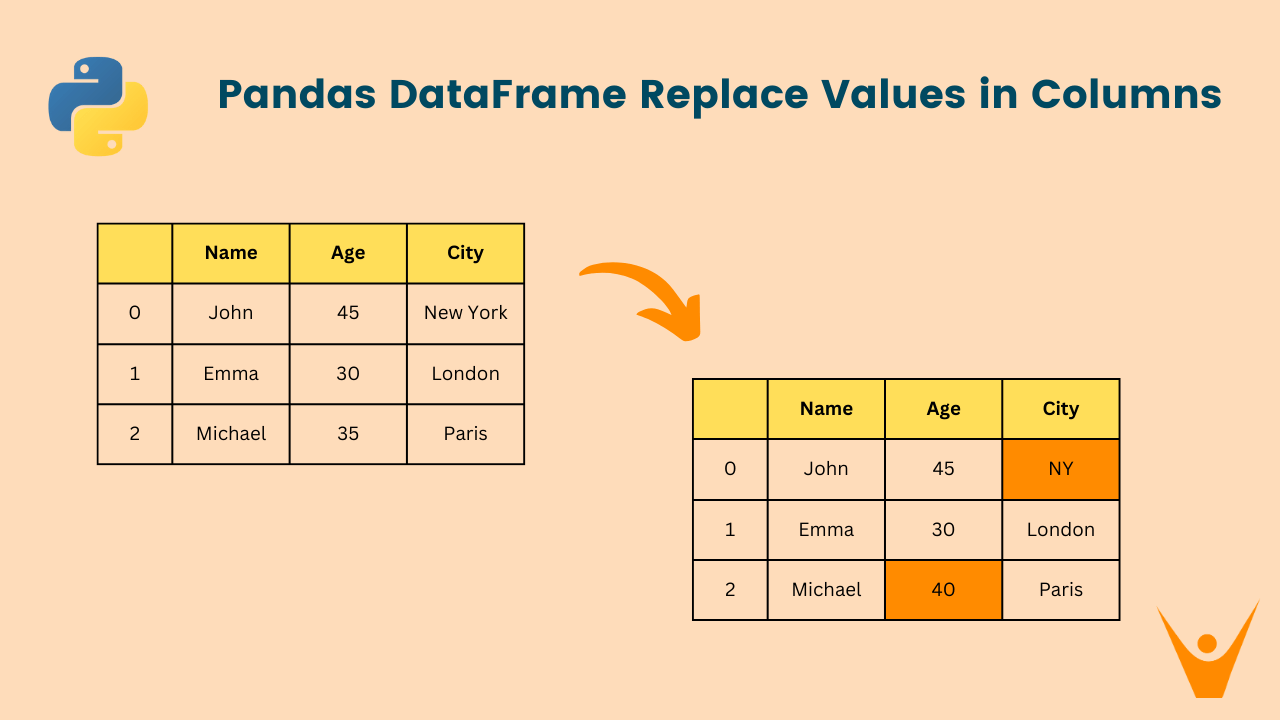

🔹 3️⃣ Replacing Data in Pandas

📖 What is Replacing?

Replacing is used to modify values within a dataset, often for cleaning purposes.

📌 Example 6: Replacing Specific Values in a Column

💡 Why Use This?

✅ Helps in data cleaning and standardization.



In [ ]:
df = pd.DataFrame({
    'Product': ['Laptop', 'Phone', 'Tablet', 'Laptop'],
    'Category': ['Electronics', 'Mobile', 'Gadgets', 'Electronics']
})

# Replacing "Gadgets" with "Electronics"
df['Category'].replace('Gadgets', 'Electronics', inplace=True)

print(df)

  Product     Category
0  Laptop  Electronics
1   Phone       Mobile
2  Tablet  Electronics
3  Laptop  Electronics


<ipython-input-29-822ead7f86a6>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Category'].replace('Gadgets', 'Electronics', inplace=True)


📌 Example 7: Replacing Multiple Values at Once

💡 Why Use This?

✅ Converts text into numeric scores for analysis.



In [ ]:
df = pd.DataFrame({
    'Feedback': ['Bad', 'Good', 'Excellent', 'Average', 'Bad']
})

# Mapping feedback scores to numeric values
feedback_mapping = {'Bad': 1, 'Average': 2, 'Good': 3, 'Excellent': 4}
df['Feedback Score'] = df['Feedback'].replace(feedback_mapping)

print(df)


---------------------------------------------------

df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, None, 30, None]
})

# Replacing missing values with the column mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

print(df)



    Feedback  Feedback Score
0        Bad               1
1       Good               3
2  Excellent               4
3    Average               2
4        Bad               1


<ipython-input-30-70cd8e2e59b4>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Feedback Score'] = df['Feedback'].replace(feedback_mapping)


📌 Example 8: Replacing Missing Values


💡 Why Use This?
✅ Helps deal with missing values in datasets.


In [ ]:
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, None, 30, None]
})

# Replacing missing values with the column mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

print(df)

      Name   Age
0    Alice  25.0
1      Bob  27.5
2  Charlie  30.0
3    David  27.5


<ipython-input-31-bf7adae8c67a>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


📌 Example 9: Replacing Based on Conditions

💡 Why Use This?

✅ Helps classify numeric values into categories.



In [ ]:
df = pd.DataFrame({
    'Salary': [50000, 60000, 45000, 70000]
})

# Replacing salaries below 50000 with 'Low', between 50000-60000 with 'Medium', and above 60000 with 'High'
df['Salary Category'] = df['Salary'].apply(lambda x: 'Low' if x < 50000 else ('Medium' if x <= 60000 else 'High'))

print(df)

   Salary Salary Category
0   50000          Medium
1   60000          Medium
2   45000             Low
3   70000            High


📌 Example 10: Replacing Outliers

💡 Why Use This?

✅ Helps remove extreme values that affect analysis.



In [ ]:
df = pd.DataFrame({
    'Price': [100, 120, 3000, 140, 160, 3200]
})

# Replacing outliers (values above 1000) with the median
df['Price'] = df['Price'].apply(lambda x: df['Price'].median() if x > 1000 else x)

print(df)

   Price
0  100.0
1  120.0
2  150.0
3  140.0
4  160.0
5  150.0


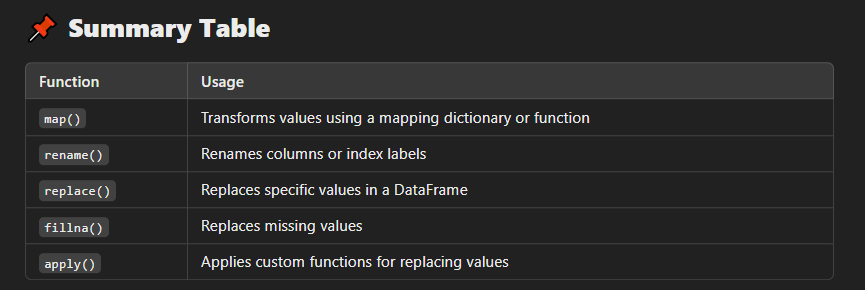